##### 儲存使用者傳送的圖片或影片
如果已經能夠透過 LINE BOT 接收使用者的訊息，下一步就能根據訊息的類型，判斷如果是圖片或影片時，將圖片或影片儲存到伺服器的電腦中，\
這篇教學會介紹透過 LINE Message API 儲存使用者傳送的圖片或影片。

##### 儲存圖片 ( 本機環境 ) 
沿用「使用 ngrok + 本機環境建立 Webhook」的範例程式，輸入 Access Token 和 Sceret 後，按照下列重點加入對應的程式碼：
* 使用 elif type == 'image' 額外判斷圖片類型訊息。
* 取得訊息 ID。
* 根據訊息 ID，透過 line_bot_api.get_message_content() 方法取得訊息內容。
* 搭配 open 內建函式庫 ( 參考「[檔案讀寫 open](https://steam.oxxostudio.tw/category/python/basic/builtin-open.html)」 )，建立二進位的 jpg 檔案，使用訊息 ID 作為檔名，並使用 .content 取得訊息的二進位內容，進行圖片存檔。

In [ ]:
from flask import Flask, request

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        access_token = '你的 Access Token'
        secret = '你的 Channel Secret'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        type = json_data['events'][0]['message']['type']     # 取得 LINE 收到的訊息類型
        # 判斷如果是文字
        if type=='text':
            msg = json_data['events'][0]['message']['text']  # 取得 LINE 收到的文字訊息
            reply = msg
        # 判斷如果是圖片
        elif type == 'image':
            msgID = json_data['events'][0]['message']['id']  # 取得訊息 id
            message_content = line_bot_api.get_message_content(msgID)  # 根據訊息 ID 取得訊息內容
            # 在同樣的資料夾中建立以訊息 ID 為檔名的 .jpg 檔案
            with open(f'{msgID}.jpg', 'wb') as fd:
                fd.write(message_content.content)             # 以二進位的方式寫入檔案
            reply = '圖片儲存完成！'                             # 設定要回傳的訊息
        else:
            reply = '你傳的不是文字或圖片呦～'
        print(reply)
        line_bot_api.reply_message(tk,TextSendMessage(reply))  # 回傳訊息
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

完成後執行程式 ( 記得先使用 ngrok 產生 webhook 網址並提交至 LINE Developer )，傳送圖片到 LINE BOT，就會自動將圖片儲存到指定的資料夾。

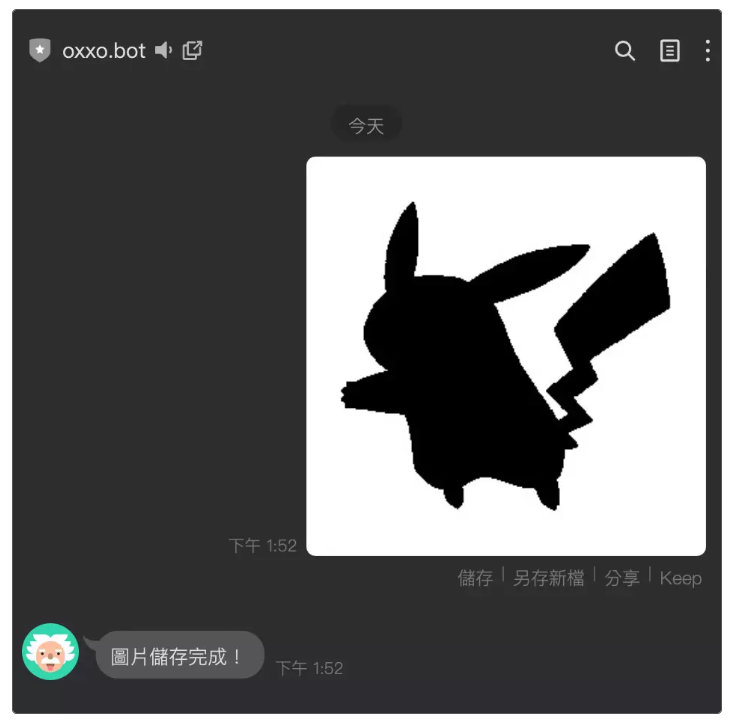

##### 儲存圖片 ( Colab ) 
如果要使用 Colab 作為開發環境，將上述的程式碼額外 import run_with_ngrok，並於程式碼中使用 run_with_ngrok(app)，就可以將使用者傳送的圖片儲存到 Google 雲端硬碟裡。

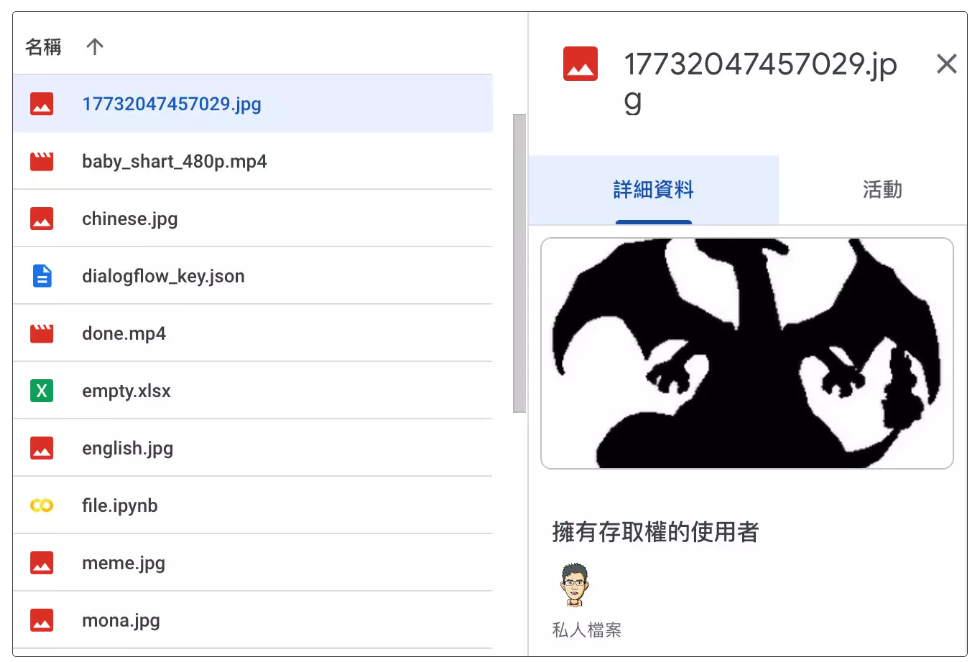

In [ ]:
from flask import Flask, request
from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
port = "5000"
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # Colab 換路徑使用

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        access_token = '你的 Access Token'
        secret = '你的 Channel Secret'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        type = json_data['events'][0]['message']['type']     # 取得 LINE 收到的訊息類型
        # 判斷如果是文字
        if type=='text':
            msg = json_data['events'][0]['message']['text']  # 取得 LINE 收到的文字訊息
            reply = msg
        # 判斷如果是圖片
        elif type == 'image':
            msgID = json_data['events'][0]['message']['id']  # 取得訊息 id
            message_content = line_bot_api.get_message_content(msgID)  # 根據訊息 ID 取得訊息內容
            # 在同樣的資料夾中建立以訊息 ID 為檔名的 .jpg 檔案
            with open(f'{msgID}.jpg', 'wb') as fd:
                fd.write(message_content.content)             # 以二進位的方式寫入檔案
            reply = '圖片儲存完成！'                             # 設定要回傳的訊息
        else:
            reply = '你傳的不是文字或圖片呦～'
        print(reply)
        line_bot_api.reply_message(tk,TextSendMessage(reply))  # 回傳訊息
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 儲存影片 ( 本機環境 ) 
LINE BOT 儲存影片的做法和儲存圖片相同，只是儲存的格式需要是 mp4，延伸前一段程式碼，額外加入 elif 判斷，就能在接收到影片訊息時儲存影片。

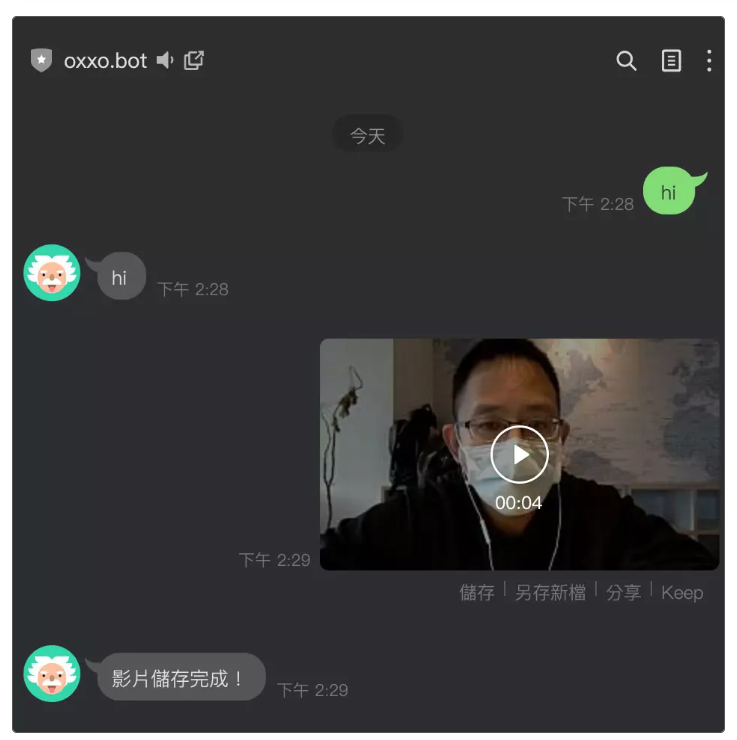

In [ ]:
from flask import Flask, request

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        access_token = '你的 Access Token'
        secret = '你的 Channel Secret'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        type = json_data['events'][0]['message']['type']     # 取得 LINE 收到的訊息類型
        # 判斷如果是文字
        if type=='text':
            msg = json_data['events'][0]['message']['text']  # 取得 LINE 收到的文字訊息
            reply = msg
        # 判斷如果是圖片
        elif type == 'image':
            msgID = json_data['events'][0]['message']['id']  # 取得訊息 id
            message_content = line_bot_api.get_message_content(msgID)  # 根據訊息 ID 取得訊息內容
            # 在同樣的資料夾中建立以訊息 ID 為檔名的 .jpg 檔案
            with open(f'{msgID}.jpg', 'wb') as fd:
                fd.write(message_content.content)             # 以二進位的方式寫入檔案
            reply = '圖片儲存完成！'                             # 設定要回傳的訊息
        # 判斷如果是影片
        elif type=='video':
            msgID = json_data['events'][0]['message']['id']
            message_content = line_bot_api.get_message_content(msgID)
            with open(f'{msgID}.mp4', 'wb') as fd:
                fd.write(message_content.content)
            reply = '影片儲存完成！'
        else:
            reply = '你傳的不是文字或圖片呦～'
        print(reply)
        line_bot_api.reply_message(tk,TextSendMessage(reply))  # 回傳訊息
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 儲存影片 ( Colab ) 
Colab 的做法也相同，在原本的程式碼裡補上 elif 判斷即可 ( 重新執行後需要更新 webhook 網址 )。

In [ ]:
from flask import Flask, request
from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
port = "5000"
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # Colab 換路徑使用

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        access_token = '你的 Access Token'
        secret = '你的 Channel Secret'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        type = json_data['events'][0]['message']['type']     # 取得 LINE 收到的訊息類型
        # 判斷如果是文字
        if type=='text':
            msg = json_data['events'][0]['message']['text']  # 取得 LINE 收到的文字訊息
            reply = msg
        # 判斷如果是圖片
        elif type == 'image':
            msgID = json_data['events'][0]['message']['id']  # 取得訊息 id
            message_content = line_bot_api.get_message_content(msgID)  # 根據訊息 ID 取得訊息內容
            # 在同樣的資料夾中建立以訊息 ID 為檔名的 .jpg 檔案
            with open(f'{msgID}.jpg', 'wb') as fd:
                fd.write(message_content.content)             # 以二進位的方式寫入檔案
            reply = '圖片儲存完成！'                             # 設定要回傳的訊息
        # 判斷如果是影片
        elif type=='video':
            msgID = json_data['events'][0]['message']['id']
            message_content = line_bot_api.get_message_content(msgID)
            with open(f'{msgID}.mp4', 'wb') as fd:
                fd.write(message_content.content)
            reply = '影片儲存完成！'
        else:
            reply = '你傳的不是文字或圖片呦～'
        print(reply)
        line_bot_api.reply_message(tk,TextSendMessage(reply))  # 回傳訊息
    except:
        print(body)             # 如果發生錯誤，印出收到的內容
    return 'OK'                 # 驗證 Webhook 使用，不能省略
if __name__ == "__main__":
    app.run()

##### 小結 
已經能夠順利透過 LINE BOT 儲存使用者傳送的圖片或影片後，就可以利用圖片或影片做更多有趣的變化 ( 例如搭配 Pillow 之類的函式庫進行修圖之類 )，\
如果要透過 Google 雲端硬碟備份，可以參考下方的文章：

https://steam.oxxostudio.tw/category/python/example/line-google-drive.html